In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [2]:
df = pd.read_csv("../data/autorenew_clean_estandar_sin_out_enc.csv", index_col=0)

In [3]:
df.head()

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,Golf_3_1.6,"10,690.28","10,690.43","10,881.72","11,782.79","7,912.58","19,432.72","8,753.18","14,478.71","20,760.72",2016-03-24 00:00:00,2016-04-07 03:16:57,"2,990.00",6.00,"49,733.00",-0.05,0.61,-0.02
1,A5_Sportback_2.7_Tdi,"10,690.28","10,690.43","10,881.72","24,522.52","7,912.58","22,216.94","10,392.23","12,732.91","6,147.93",2016-03-24 00:00:00,2016-04-07 01:46:50,"18,300.00",5.00,"66,954.00",0.39,-0.02,0.07
2,"Jeep_Grand_Cherokee_""Overland""","10,690.28","10,690.43","10,881.72","13,006.87","13,095.47","9,876.84","10,392.23","11,828.02","20,760.72",2016-03-14 00:00:00,2016-04-05 12:47:46,"9,800.00",8.00,"90,480.00",0.25,-0.02,-0.01
3,GOLF_4_1_4__3TÜRER,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","19,432.72","8,753.18","14,478.71","8,559.12",2016-03-17 00:00:00,2016-03-17 17:40:17,"1,500.00",6.00,"91,074.00",-0.21,0.61,-0.04
4,Skoda_Fabia_1.4_TDI_PD_Classic,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","4,127.68","10,392.23","6,310.38","8,559.12",2016-03-31 00:00:00,2016-04-06 10:17:21,"3,600.00",7.00,"60,437.00",-0.24,-0.89,0.04


In [4]:
df_analize = df.drop(columns=['name','dateCreated','lastSeen'])

In [5]:
df_analize.head()

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,"10,690.28","10,690.43","10,881.72","11,782.79","7,912.58","19,432.72","8,753.18","14,478.71","20,760.72","2,990.00",6.00,"49,733.00",-0.05,0.61,-0.02
1,"10,690.28","10,690.43","10,881.72","24,522.52","7,912.58","22,216.94","10,392.23","12,732.91","6,147.93","18,300.00",5.00,"66,954.00",0.39,-0.02,0.07
2,"10,690.28","10,690.43","10,881.72","13,006.87","13,095.47","9,876.84","10,392.23","11,828.02","20,760.72","9,800.00",8.00,"90,480.00",0.25,-0.02,-0.01
3,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","19,432.72","8,753.18","14,478.71","8,559.12","1,500.00",6.00,"91,074.00",-0.21,0.61,-0.04
4,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","4,127.68","10,392.23","6,310.38","8,559.12","3,600.00",7.00,"60,437.00",-0.24,-0.89,0.04


In [6]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df_analize, variable_dependiente='price_knn')

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.head()

,Real,Predicho,Conjunto,Modelo,Residuos
281331,"1,500.00","1,500.00",Train,tree,0.00
122061,"3,000.00","3,000.00",Train,tree,0.00
204257,"3,125.00","3,125.00",Train,tree,0.00
77827,0.00,0.00,Train,tree,0.00
180278,"2,150.00","2,150.00",Train,tree,0.00


In [7]:
#analisis.plot_residuos("tree")

In [8]:
analisis.calcular_metricas("tree")

,train,test
R2,1.00,-238.25
MAE,11.07,"20,925.75"
MSE,"36,573.92","1,766,085,648,080.00"
RMSE,191.24,"1,328,941.55"


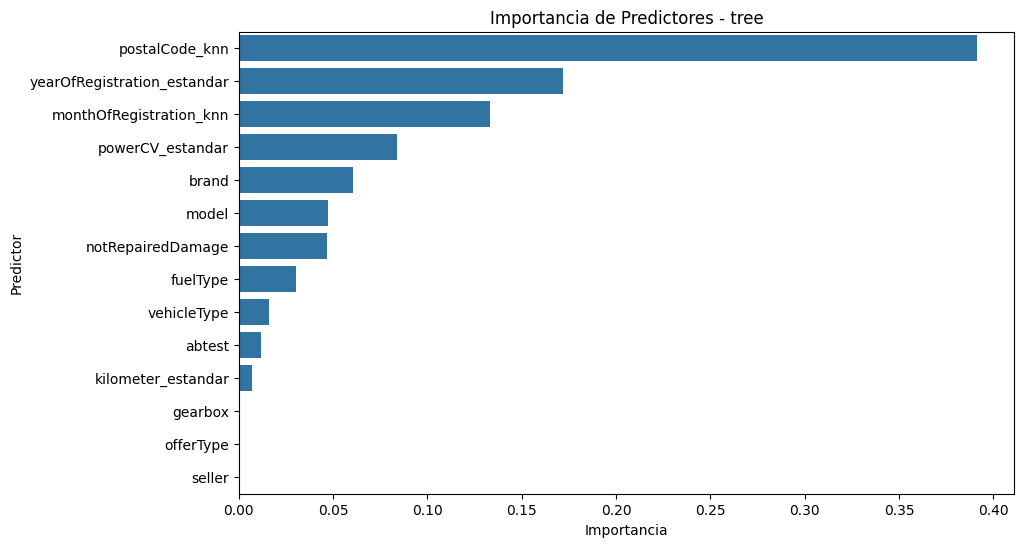

,Predictor,Importancia
10,postalCode_knn,0.39
13,yearOfRegistration_estandar,0.17
9,monthOfRegistration_knn,0.13
11,powerCV_estandar,0.08
7,brand,0.06
5,model,0.05
8,notRepairedDamage,0.05
6,fuelType,0.03
3,vehicleType,0.02
2,abtest,0.01


In [9]:
analisis.importancia_predictores("tree")

In [10]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df_analize, variable_dependiente='price_knn')

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head()

,Real,Predicho,Conjunto,Modelo,Residuos
281331,"1,500.00","1,831.10",Train,random_forest,-331.10
122061,"3,000.00","2,989.90",Train,random_forest,10.10
204257,"3,125.00","3,143.83",Train,random_forest,-18.83
77827,0.00,323.71,Train,random_forest,-323.71
180278,"2,150.00","2,325.23",Train,random_forest,-175.23


In [12]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.84,-18.27
MAE,"6,037.43","13,349.07"
MSE,"81,479,419,426.02","142,266,845,394.49"
RMSE,"285,446.00","377,182.77"


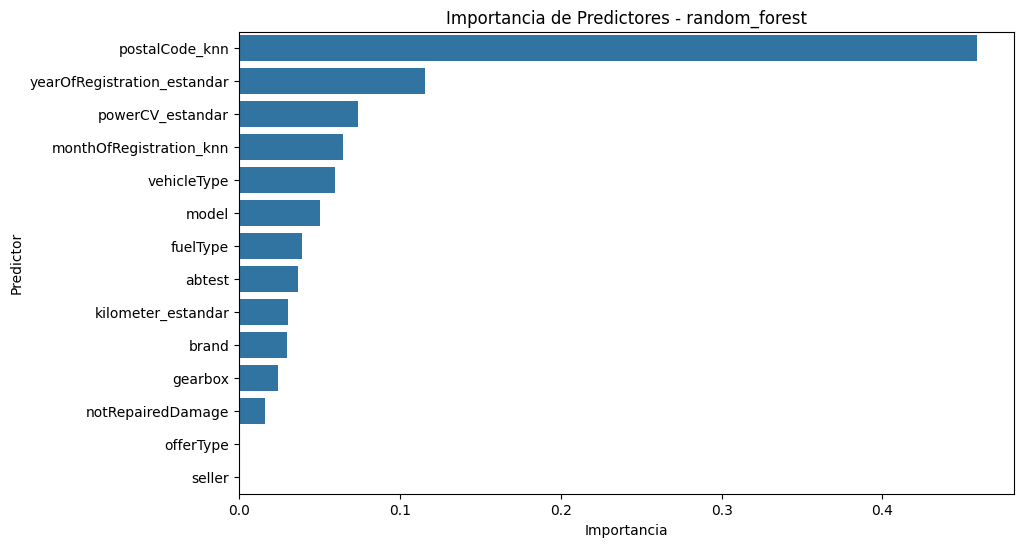

,Predictor,Importancia
10,postalCode_knn,0.46
13,yearOfRegistration_estandar,0.12
11,powerCV_estandar,0.07
9,monthOfRegistration_knn,0.06
3,vehicleType,0.06
5,model,0.05
6,fuelType,0.04
2,abtest,0.04
12,kilometer_estandar,0.03
7,brand,0.03


In [13]:
analisis_random_forest.importancia_predictores("random_forest")

In [14]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df_analize, variable_dependiente='price_knn')

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head()

,Real,Predicho,Conjunto,Modelo,Residuos
281331,"1,500.00","2,903.61",Train,gradient_boosting,"-1,403.61"
122061,"3,000.00","39,284.16",Train,gradient_boosting,"-36,284.16"
204257,"3,125.00",75.78,Train,gradient_boosting,"3,049.22"
77827,0.00,"84,114.43",Train,gradient_boosting,"-84,114.43"
180278,"2,150.00","6,807.10",Train,gradient_boosting,"-4,657.10"


In [15]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.16,-3.38
MAE,"15,028.26","11,891.92"
MSE,"431,374,272,166.11","32,338,941,453.59"
RMSE,"656,790.89","179,830.31"


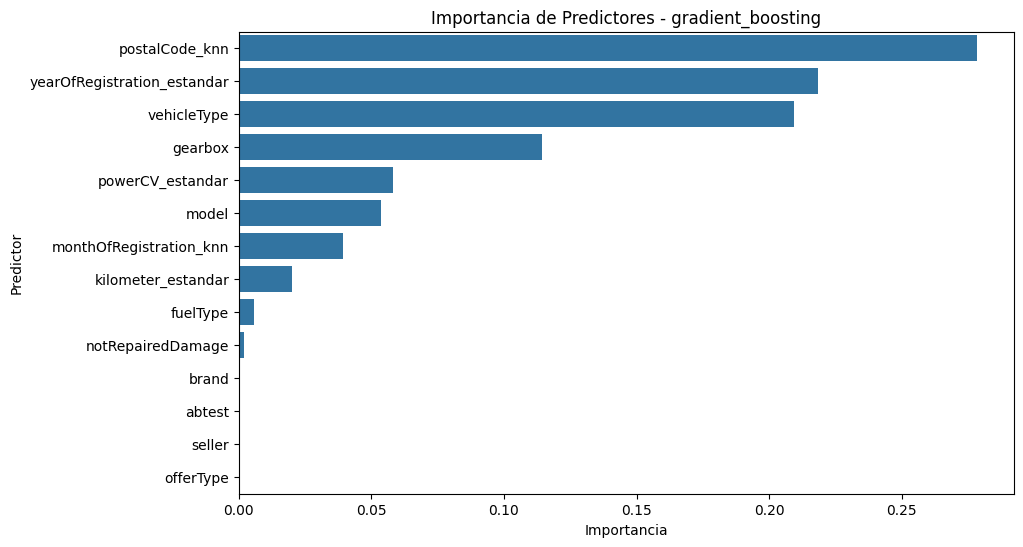

,Predictor,Importancia
10,postalCode_knn,0.28
13,yearOfRegistration_estandar,0.22
3,vehicleType,0.21
4,gearbox,0.11
11,powerCV_estandar,0.06
5,model,0.05
9,monthOfRegistration_knn,0.04
12,kilometer_estandar,0.02
6,fuelType,0.01
8,notRepairedDamage,0.00


In [16]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")

In [17]:
# instanciamos la clase de regresión lineal
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df_analize, variable_dependiente='price_knn')

# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head()

,Real,Predicho,Conjunto,Modelo,Residuos
281331,"1,500.00","-3,337.97",Train,xgboost,"4,837.97"
122061,"3,000.00","10,669.53",Train,xgboost,"-7,669.53"
204257,"3,125.00","1,863.39",Train,xgboost,"1,261.61"
77827,0.00,"-38,737.50",Train,xgboost,"38,737.50"
180278,"2,150.00","3,879.12",Train,xgboost,"-1,729.12"


In [18]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.79,-33.29
MAE,"16,676.54","23,207.21"
MSE,"110,016,101,098.41","253,145,871,045.53"
RMSE,"331,686.75","503,136.04"


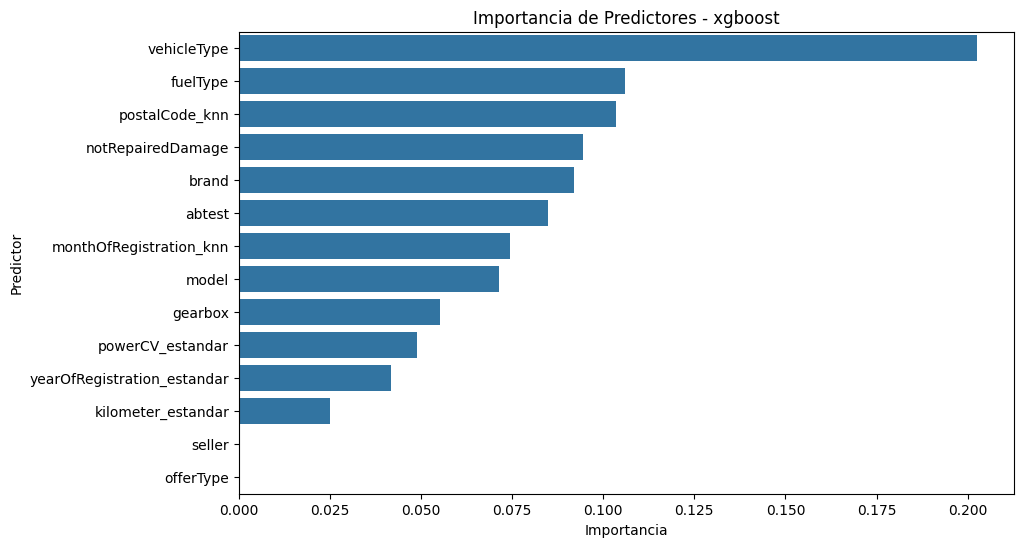

,Predictor,Importancia
3,vehicleType,0.20
6,fuelType,0.11
10,postalCode_knn,0.10
8,notRepairedDamage,0.09
7,brand,0.09
2,abtest,0.08
9,monthOfRegistration_knn,0.07
5,model,0.07
4,gearbox,0.06
11,powerCV_estandar,0.05


In [19]:
analisis_xgboost.importancia_predictores("xgboost")

In [20]:
# instanciamos la clase de regresión lineal
analisis_regresion= sa.AnalisisModelosRegresion(dataframe=df_analize, variable_dependiente='price_knn')

# llamamos a la función para ajustar el modelo
analisis_regresion.ajustar_modelo(modelo='regresion')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_regresion = analisis_regresion.obtener_resultados()
df_resultados_regresion.head()

,Real,Predicho,Conjunto,Modelo,Residuos
281331,"1,500.00","9,360.54",Train,regresion,"-7,860.54"
122061,"3,000.00","47,033.39",Train,regresion,"-44,033.39"
204257,"3,125.00","-2,038.97",Train,regresion,"5,163.97"
77827,0.00,"129,436.30",Train,regresion,"-129,436.30"
180278,"2,150.00","10,631.08",Train,regresion,"-8,481.08"


In [21]:
analisis_regresion.calcular_metricas("regresion")

,train,test
R2,0.00,-0.03
MAE,"17,681.56","12,441.79"
MSE,"514,507,841,246.39","7,580,873,215.96"
RMSE,"717,292.02","87,068.21"
